# SIT742: Modern Data Science 
**(2020 Assessment Task 01: Exploration for Data Scientists Survey Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Andrew Hall
- Student ID:  217480915
- Email:  hallamtouring@live.com
- Lab Session and Tutor (for on campus students): 

---

## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 

In this task, you will need to 

- **Part 1**: Given the following two data sets, you are required to finish some required analysis, with the exploreation data analytics skills as well as visuilization skills
     - [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv): Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.     
     - [ConversionRates.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv): Currency conversion rates to USD. 
- **Part 2**: Given the following data set, you are required to find out top keywords for hiring the data scientists. 
    - [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv): Data scientists job advertising in US with job descriptions, from JobPikr.


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## Part 1 - What we could know about the Data Scientists? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***


In [4]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=c23b73af3b7a8b9e0411d8f266c45b2835c81a667cfbfde50f0f4783841b30d8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import wget
import seaborn as sns
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load MCQResponses.csv into dataframe df_demog, and check the data statistics and general infommation by printing its top 5 rows.
</div>

In [8]:
# Your code
def describe_col(x):    #function to print first entries of each column on seperate lines, as well as type dependent statistics and information  
    y = x.head(5).values
    print(y[0])
    print(y[1])
    print(y[2])
    print(y[3])
    print(y[4])
    print()
    print('Field summary:')
    if x.dtypes == 'float64' or x.dtypes == 'int64':
        print(x.describe())
    else:
        print(x.describe(include=[np.object]))
        print(x.unique())

df_demog =  pd.read_csv("https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv")   #read the file into the dataframe

for i in df_demog.columns:                                                                                        #for each column in dataframe
    print('Column %s is of type %s. The first five entries are:' % (df_demog[i].name, df_demog[i].dtypes))        #print out summary data
    describe_col(df_demog[i])
    print('\n\n')

Column GenderSelect is of type object. The first five entries are:
Male
Female
Male
Male
Male

Field summary:
count     4327
unique       3
top       Male
freq      3724
Name: GenderSelect, dtype: object
['Male' 'Female' 'A different identity']



Column Country is of type object. The first five entries are:
United States
Australia
Russia
India
Taiwan

Field summary:
count              4327
unique               52
top       United States
freq               1224
Name: Country, dtype: object
['United States' 'Australia' 'Russia' 'India' 'Taiwan' 'Czech Republic'
 'Colombia' 'Germany' 'Poland' 'United Kingdom' 'Sweden' 'Portugal'
 'Mexico' 'Iran' 'France' 'Spain' 'Hungary' 'Brazil' 'Other' 'Canada'
 'New Zealand' 'Netherlands' 'Chile' 'Belarus' 'South Africa'
 'South Korea' 'Italy' 'Ukraine' 'Ireland' 'Argentina' 'Hong Kong'
 "People 's Republic of China" 'Japan' 'Malaysia' 'Vietnam' 'Philippines'
 'Switzerland' 'Indonesia' 'Singapore' 'Pakistan' 'Nigeria' 'Turkey'
 'Norway' 'Kenya' 'Isra

<div class="alert alert-block alert-info">

**Code**: 
    Check which columns have NAs (don't remove them now), and for each of those columns, display how many records with values


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.A** Please include your result for this coding task into your report, with proper section title '1.0.A'.
</div>
    </div>




In [9]:
# Your Code
print('The columns which have null values are:')
NullValues = []                                                                                                       #Create empty list
for c in list(df_demog.columns):                                                                                      #for each column in df_demog
    if df_demog[c].isnull().any():                                                                                    #If it has any null values
        NullValues.append(df_demog[c].name)                                                                           #Add column name to list
        print('- %s - It has %d valid values.' % (df_demog[c].name, df_demog[c].count() - df_demog[c].isna().sum()))  #Output Column names and number of valid elements

The columns which have null values are:
- TitleFit - It has 4175 valid values.
- CurrentEmployerType - It has 4223 valid values.
- MLToolNextYearSelect - It has 4085 valid values.
- MLMethodNextYearSelect - It has 4013 valid values.
- LanguageRecommendationSelect - It has 4129 valid values.
- MajorSelect - It has 3577 valid values.
- FirstTrainingSelect - It has 4321 valid values.
- JobSatisfaction - It has 4307 valid values.


<div class="alert alert-block alert-info">

**Code**: 
    Select the users whose current job title is 'Data Scientist', and store into variable df_demog_ds    

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.B** Please include your result of `how many Data Scientists?' into your report, with proper section title  '1.0.B'.
</div>
</div>




In [10]:
# Your code
df_demog_ds = df_demog.loc[(df_demog.CurrentJobTitleSelect == 'Data Scientist')]                #Select thos rows in df_demog.loc whose current title is "Data Scientist"

#Output summary results
print("Of the %d records in the MCQResponses.csv data set, %d have a title of 'Data Scientist'" % (df_demog.CurrentJobTitleSelect.count(), df_demog_ds.CurrentJobTitleSelect.count()))
print('That represents %2.2f%% of respondents.' % ((df_demog_ds.CurrentJobTitleSelect.count()/df_demog.CurrentJobTitleSelect.count())*100))

Of the 4327 records in the MCQResponses.csv data set, 1263 have a title of 'Data Scientist'
That represents 29.19% of respondents.


### 1.1. Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


<div class="alert alert-block alert-info">

**Code**: 
    Plot and display as text output the number and percentage of data scientist with each type of formal education. 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please include your running result of this coding task into your report, with proper section title  '1.1.A'.
</div>

</div>

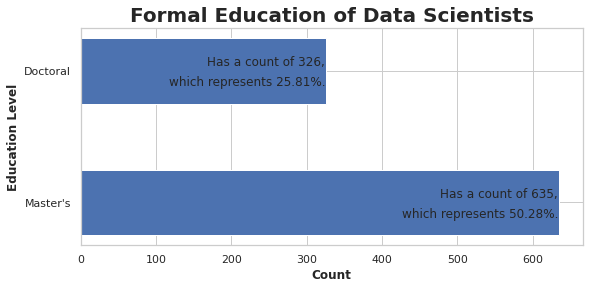

In [11]:
# Your code
dscount = df_demog_ds['FormalEducation'].count()                                                                #store total DS count
mdscount = df_demog_ds.loc[(df_demog_ds.FormalEducation == "Master's degree"), ['FormalEducation']].count()     #store total Masters DS count
ddscount = df_demog_ds.loc[(df_demog_ds.FormalEducation == "Doctoral degree"), ['FormalEducation']].count()     #store total Doctoral DS count
cats = ["Master's", "Doctoral"]
cat_counts = [mdscount[0], ddscount[0]]
cat_percent = (cat_counts / dscount) * 100

fig = plt.figure(figsize = (9, 4))                                                                              #create plot figure
cs = fig.add_subplot(111)                                                                                       #assign figure to first subplot position

for x, y, z in zip(cat_counts,cats,cat_percent):                                                                #based on code from http://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
    label1 = "Has a count of {:d},".format(x)

    plt.annotate(label1,                                                                                        #formated text related to count
                 (x,y),                                                                                         #point of label
                 textcoords = "offset points",                 
                 xytext = (-1,5),                                                                               #ofset from point of label
                 ha = 'right')                                                                                  #horizontal alignment of text

    label2 = "which represents {:.2f}%.".format(z)

    plt.annotate(label2,                                                                                        #formated text related to percentage
                 (x,y),                                                                                         #point of label
                 textcoords = "offset points", 
                 xytext = (-1,-15),                                                                             #ofset from point of label
                 ha = 'right')                                                                                  #horizontal alignment of text


cs.set_title('Formal Education of Data Scientists', fontsize = 20, fontweight = 'bold')
cs.set_xlabel('Count', fontweight = 'bold')
cs.set_ylabel('Education Level', fontweight = 'bold')
cs.barh(cats, cat_counts, height = 0.5)
plt.show()

### 1.2. Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

First of all, you need to merge the multiple choice data with the *ConversionRates.csv* by using the compensation currency and originCountry respectively. And then you will need to multiply the compensation amount with exchangeRateAUS to have the Australian dollors.

In [12]:
# Your code
df_currencies =  pd.read_csv("https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv")           #read the file into the dataframe

df_demog_ds_aud = pd.merge(df_demog_ds, df_currencies, left_on='CompensationCurrency', right_on='originCountry', how='inner')     #inner merge of two datasets

print(df_demog_ds_aud.count().max())                                                                                              #print record count of resultant dataset
testl = pd.merge(df_demog_ds, df_currencies, left_on='CompensationCurrency', right_on='originCountry', how='left')                #perform left merge to id rouge record
print(testl.loc[testl['exchangeRate'].isnull(), ['CompensationCurrency']])                                                        #print currency without exchange rate

df_demog_ds_aud.drop(['originCountry', 'Unnamed: 0'], axis=1, inplace=True)                                                       #remove duplicate columns

aud = df_currencies.loc[(df_currencies.originCountry == "AUD"), ['exchangeRate']]                                                 #obtain AUD to USD exchange rate
df_demog_ds_aud['AUDCompensation'] = df_demog_ds_aud['CompensationAmount'] * df_demog_ds_aud['exchangeRate'] / aud.iloc[0,0]      #calculate via multiplication 


1262
     CompensationCurrency
1118                  SPL


<div class="alert alert-block alert-info">

**Code**: 
Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.A** In your report's section '1.2.A', answer what is the maximum and median salary in AUD.
</div>


</div>


In [13]:
# Your code
print('There are %d AUD pay entries.' % (len(df_demog_ds_aud['AUDCompensation'])))                              #print rocord count
print('The mean AUD pay is ${:0,.2f}.'.format(df_demog_ds_aud['AUDCompensation'].mean()))                       #print mean value
print('The median AUD pay is ${:0,.2f}.'.format(df_demog_ds_aud['AUDCompensation'].median()))                   #print median value 
common_pay = df_demog_ds_aud['AUDCompensation'].mode()
print('The most common AUD pay is ${:0,.2f}.'.format(common_pay[0]))                                            #print modal value
print('')
print('The minimum AUD pay is ${:0,.2f}.'.format(df_demog_ds_aud['AUDCompensation'].min()))                     #print min value
print('The 25th quantile AUD pay is ${:0,.2f}.'.format(df_demog_ds_aud['AUDCompensation'].quantile(0.25)))      #print 25th qtr value
print('The 75th quantile AUD pay is ${:0,.2f}.'.format(df_demog_ds_aud['AUDCompensation'].quantile(0.75)))      #print 75th qtr value
print('The maximum AUD pay is ${:0,.2f}.'.format(df_demog_ds_aud['AUDCompensation'].max()))                     #print max value
print ('')
df_demog_ds.loc[df_demog_ds['CompensationCurrency'] == 'SPL']                                                   #print unconverted record

There are 1262 AUD pay entries.
The mean AUD pay is $100,885.16.
The median AUD pay is $88,828.58.
The most common AUD pay is $149,568.12.

The minimum AUD pay is $0.07.
The 25th quantile AUD pay is $42,934.07.
The 75th quantile AUD pay is $145,075.08.
The maximum AUD pay is $742,711.17.



,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
3812,Male,United States,31,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that doesn't perform adv...,TensorFlow,Neural Nets,Python,Doctoral degree,Physics,Work,115000.0,SPL,7


<div class="alert alert-block alert-info">

**Code**: 
Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.B** In your report's section '1.2.B', answer what is the maximum and median salary in AUD for Australian respondents, and also include your plotted boxplot of this coding task into your report. 
</div>


</div>


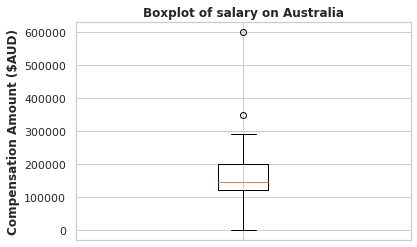

In [14]:
plt.title("Boxplot of salary on Australia", fontweight = 'bold')

# Your code
AUD_pay = pd.DataFrame(df_demog_ds.loc[df_demog_ds['Country'] == 'Australia']['CompensationAmount'])      #obtain Australian respondents

plt.ylabel('Compensation Amount ($AUD)', fontweight = 'bold')
plt.xlabel('')
plt.tick_params(axis='x', labelbottom=False)                                                              #disable default xtick value

plt.boxplot(AUD_pay['CompensationAmount'].values.astype(int))                                             #generate boxplot
plt.show()

In [15]:
# Your code

print('There are %d Australian pay entries for Data Scientists.' % (len(AUD_pay['CompensationAmount'])))                              #print rocord count
print('The mean Australian pay is ${:0,.2f}.'.format(AUD_pay['CompensationAmount'].mean()))                       #print mean value
print('The median Australian pay is ${:0,.2f}.'.format(AUD_pay['CompensationAmount'].median()))                   #print median value 
aus_pay = AUD_pay['CompensationAmount'].mode()
print('The most common Australian pay is ${:0,.2f}.'.format(aus_pay[0]))                                          #print modal value
print('')
print('The minimum Australian pay is ${:0,.2f}.'.format(AUD_pay['CompensationAmount'].min()))                     #print min value
print('The 25th quantile Australian pay is ${:0,.2f}.'.format(AUD_pay['CompensationAmount'].quantile(0.25)))      #print 25th qtr value
print('The 75th quantile Australian pay is ${:0,.2f}.'.format(AUD_pay['CompensationAmount'].quantile(0.75)))      #print 75th qtr value
print('The maximum Australian pay is ${:0,.2f}.'.format(AUD_pay['CompensationAmount'].max()))                     #print max value


There are 29 Australian pay entries for Data Scientists.
The mean Australian pay is $169,628.10.
The median Australian pay is $147,000.00.
The most common Australian pay is $250,000.00.

The minimum Australian pay is $90.00.
The 25th quantile Australian pay is $120,000.00.
The 75th quantile Australian pay is $200,000.00.
The maximum Australian pay is $600,000.00.


<div class="alert alert-block alert-info">

**Code**: 
There are some outliers in the Australian salary plot. You are required to filter the salary of Australian respondents by removing any below 40,000 or above 250,000. 

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.C** In your report's section '1.2.C', answer what is the new maximum and median salary in AUD for Australian respondents after filtering, and also include your plotted boxplot of this coding task into your report. 
</div>


</div>


In [16]:
# your code
AUD_pay_filtered = AUD_pay.loc[(AUD_pay.CompensationAmount >= 40000)  & (AUD_pay.CompensationAmount <= 250000)]                     #filter Australian respondents

print('There are %d Australian pay entries without outliers.' % (len(AUD_pay_filtered['CompensationAmount'])))                      #print rocord count
print('The mean filtered Australian pay is ${:0,.2f}.'.format(AUD_pay_filtered['CompensationAmount'].mean()))                       #print mean value
print('The median filtered Australian pay is ${:0,.2f}.'.format(AUD_pay_filtered['CompensationAmount'].median()))                   #print median value 
aus_pay_filtered = AUD_pay_filtered['CompensationAmount'].mode()
print('The most common filtered Australian pay is ${:0,.2f}.'.format(aus_pay_filtered[0]))                                          #print modal value
print('')
print('The minimum filtered Australian pay is ${:0,.2f}.'.format(AUD_pay_filtered['CompensationAmount'].min()))                     #print min value
print('The 25th quantile filtered Australian pay is ${:0,.2f}.'.format(AUD_pay_filtered['CompensationAmount'].quantile(0.25)))      #print 25th qtr value
print('The 75th quantile filtered Australian pay is ${:0,.2f}.'.format(AUD_pay_filtered['CompensationAmount'].quantile(0.75)))      #print 75th qtr value
print('The maximum filtered Australian pay is ${:0,.2f}.'.format(AUD_pay_filtered['CompensationAmount'].max()))                     #print max value


There are 24 Australian pay entries without outliers.
The mean filtered Australian pay is $153,291.67.
The median filtered Australian pay is $143,500.00.
The most common filtered Australian pay is $250,000.00.

The minimum filtered Australian pay is $50,000.00.
The 25th quantile filtered Australian pay is $123,750.00.
The 75th quantile filtered Australian pay is $172,500.00.
The maximum filtered Australian pay is $250,000.00.


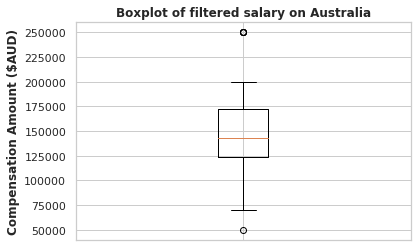

In [17]:
plt.title("Boxplot of filtered salary on Australia", fontweight = 'bold')

# Your code
plt.ylabel('Compensation Amount ($AUD)', fontweight = 'bold')
plt.xlabel('')
plt.tick_params(axis='x', labelbottom=False)                                  #disable default xtick value

plt.boxplot(AUD_pay_filtered['CompensationAmount'].values.astype(int))        #generate boxplot
plt.show()

### 1.3. Exploring the data scientist Demographics
<a id="demographics"></a>
***

#### 1.3.1 Age
<a id="age"></a>
You will need to build a boxplot to explore the age of all data scientists. 
Your plot must have a label for each axis, a tittle and also show the outliers.

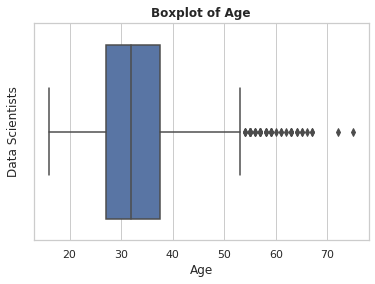

In [18]:
plt.title("Boxplot of Age", fontweight = 'bold')

ax = sns.boxplot(x=df_demog_ds["Age"]).set(ylabel='Data Scientists')

<div class="alert alert-block alert-info">

**Code**: 
        <ol>
        <li> Calculate the five descriptive statistics for age as shown on the boxplot, as well as the mean. Please round your mean to integer.</li>
        <li> Regardless of the errors that the data show, we are interested in working-age data scientists, how many aged between 24 and 60. </li>
        <li> How many respondents were under 18?</li>
    </ol>
    

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.A** In your report's section '1.3.A', answer 
        <ol>
        <li> What is the mean age? </li>
        <li> What is the median age? </li>
        <li> how many data scientists aged between 24 and 60</li>
        <li> how many respondents were under 18? </li>
    </ol>
    
</div>


</div>







In [19]:
# Your code
print('The mean Age of Data Scientist respondents is %d.' % (round(df_demog_ds['Age'].mean())))                #print mean value
print('The median Age of Data Scientist respondents is %d.' % (df_demog_ds['Age'].median()))                   #print median value 
ds_age = df_demog_ds['Age'].mode()
print('The most Age of Data Scientist respondents is %d.' % (ds_age[0]))                                       #print modal value
print('')
print('The minimum Age of Data Scientist respondents is %d.' % (df_demog_ds['Age'].min()))                     #print min value
print('The 25th quantile Age of Data Scientist respondents is %d.' % (df_demog_ds['Age'].quantile(0.25)))      #print 25th qtr value
print('The 75th quantile Age of Data Scientist respondents is %d.' % (df_demog_ds['Age'].quantile(0.75)))      #print 75th qtr value
print('The maximum Age of Data Scientist respondents is %d.' % (df_demog_ds['Age'].max()))                     #print max value
print ('')

The mean Age of Data Scientist respondents is 34.
The median Age of Data Scientist respondents is 32.
The most Age of Data Scientist respondents is 27.

The minimum Age of Data Scientist respondents is 16.
The 25th quantile Age of Data Scientist respondents is 27.
The 75th quantile Age of Data Scientist respondents is 37.
The maximum Age of Data Scientist respondents is 75.



In [0]:
# Your code


In [0]:
# Your code



In [20]:
# Your code: How many data scientsits aged between 24 and 60
print("There are %d respondent Data Scientists between the ages of 24 and 60 inclusive." % (len(df_demog_ds.loc[(df_demog_ds.Age >= 24) & (df_demog_ds.Age <= 60)]))) 


There are 1188 respondent Data Scientists between the ages of 24 and 60 inclusive.


In [21]:
# Your Code: how many respondents under 18?
print("There is %d respondent Data Scientists under the age of 18." % (len(df_demog_ds.loc[(df_demog_ds.Age < 18)]))) 

There is 1 respondent Data Scientists under the age of 18.


#### 1.3.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


<div class="alert alert-block alert-info">

**Code**: 
Plot the gender distribution of the data scientist users using a Barchart. 
</div>


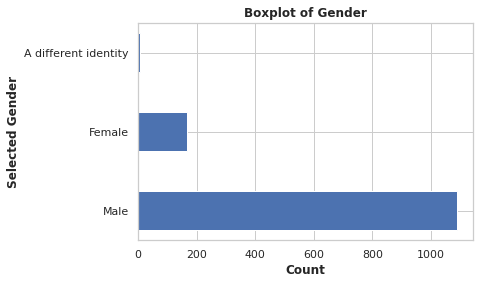

In [22]:
plt.title("Boxplot of Gender", fontweight = 'bold')

# Your code
Gcount = pd.DataFrame(df_demog_ds.GenderSelect.value_counts())          #calculate counts grouped by GenderSelect

plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Selected Gender', fontweight = 'bold')
plt.barh(Gcount.index.values, Gcount.GenderSelect.values, height = 0.5)
plt.show()

Now let's see if any relationship between gender and age

Create a box plot showing the age of all the data scientists according to gender (men, women and other identity).

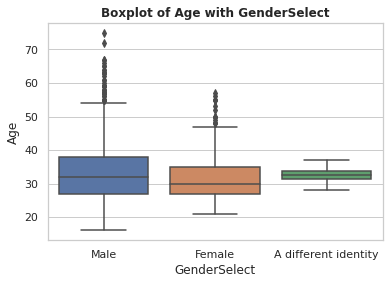

In [23]:
plt.title("Boxplot of Age with GenderSelect", fontweight = 'bold')

# Your code here   
ax = sns.boxplot( x = df_demog_ds.GenderSelect, y = df_demog_ds.Age)
plt.show()    

<div class="alert alert-block alert-info">

**Code**: 
You are required to use the barchart to show the percentage of men, women and other identity.
    
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.B** In your report's section '1.3.B', include the bar chart generated from your code.
</div>
    

</div>

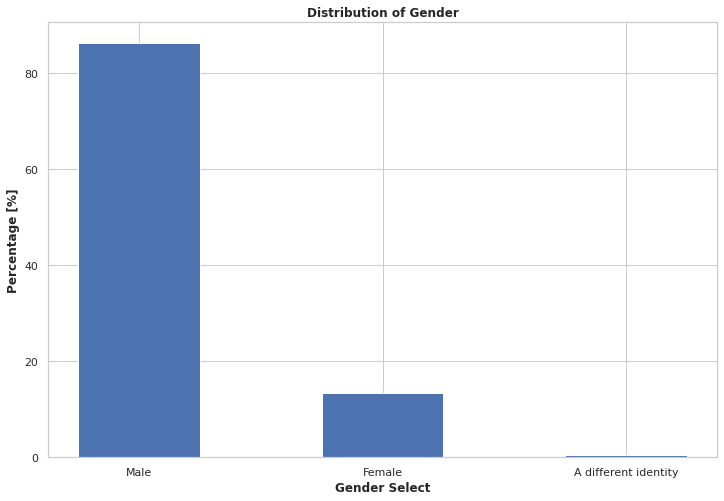

In [24]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Gender', fontweight = 'bold')
plt.xlabel('Gender Select', fontweight = 'bold')
plt.ylabel('Percentage [%]', fontweight = 'bold')

# Your code
plt.bar(Gcount.index.values, Gcount.GenderSelect.values / len(df_demog_ds) * 100, align='center', alpha=1, width= 0.5)
plt.show()    

#### 1.3.3 Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

<div class="alert alert-block alert-info">

**Code**: 
Find the top 5 countries of data scientists.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.C** In your report's section '1.3.C', answer what are those top 5 countries and their corresponding number of data scienists
</div>
    

</div>

In [25]:
# Your Code: create and fill value into df_country
Ccount = pd.DataFrame(df_demog_ds.Country.value_counts())          #calculate counts grouped by Country

Ccount.head(5)

,Country
United States,414
India,111
France,60
United Kingdom,55
Germany,50


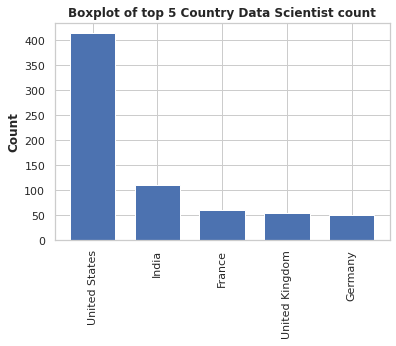

In [26]:
plt.title("Boxplot of top 5 Country Data Scientist count", fontweight = 'bold')

plt.bar(Ccount.head(5).index.values, Ccount.head(5).Country.values, align='center', alpha=1, width= 0.7)
plt.xticks(rotation=90)
plt.ylabel(ylabel="Count", fontweight = 'bold')
plt.show()    

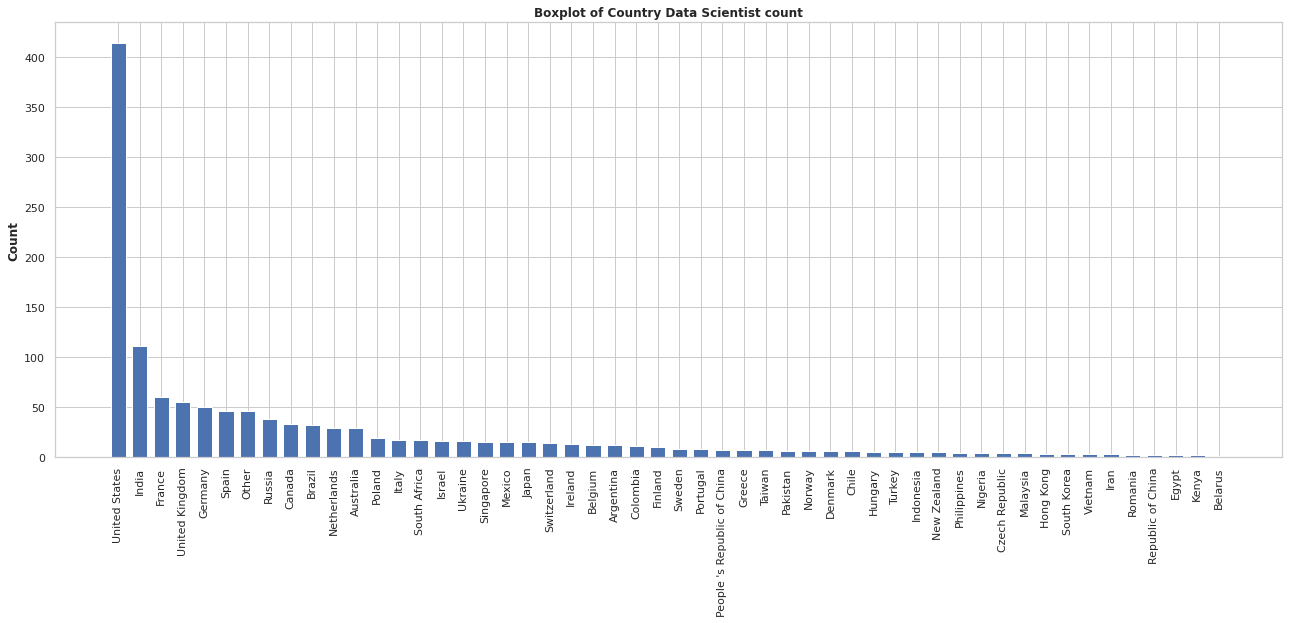

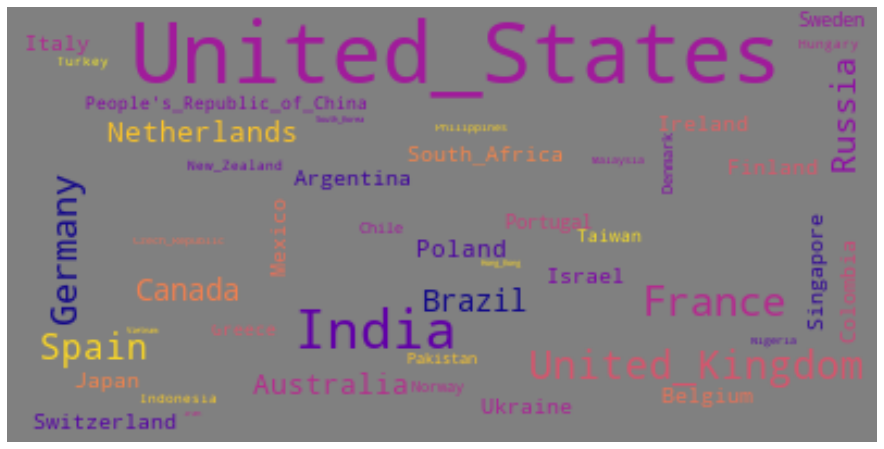

In [27]:
# Show the Boxplot of country
plt.figure(figsize=(22,8))
plt.title("Boxplot of Country Data Scientist count", fontweight = 'bold')

plt.bar(Ccount.index.values, Ccount.Country.values, align='center', alpha=1, width= 0.7)
plt.xticks(rotation=90)
plt.ylabel(ylabel="Count", fontweight = 'bold')
plt.show()    


!pip install wordcloud

from os import path
from wordcloud import WordCloud

# Show WordCloud of Country
plt.figure(figsize=(22,8))
wordcloud = WordCloud(collocations = False, colormap="plasma", background_color='grey').generate(str(list(df_demog_ds.Country)).replace("\'","").strip('[]').replace(' ','_').replace(',_','", "').replace("e_s","e\'s"))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<div class="alert alert-block alert-info">

**Code**: 
Generate the distribution of top 5 countries of data scientists, using percentage barchart. You can not mannually input the name of top 5 countries (your code should not contain any name of the top 5 countries), and you are required to use python subset functions or many other functions.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.D** In your report's section '1.3.D', including the percentage barchart of those top 5 countries.
</div>
    

</div>

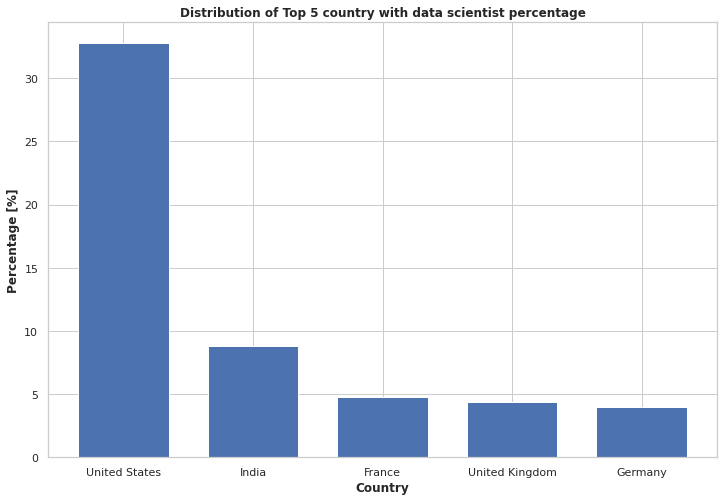

In [28]:
#percentage
plt.figure(figsize=(12,8))
plt.title('Distribution of Top 5 country with data scientist percentage', fontweight = 'bold')
plt.xlabel('Country', fontweight = 'bold')
plt.ylabel('Percentage [%]', fontweight = 'bold')


#Your Code: create and fill values into df_country_top5
plt.bar(Ccount.head(5).index.values, Ccount.head(5).Country.values / len(df_demog_ds) * 100, align='center', alpha=1, width= 0.7)
plt.show()


Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

<div class="alert alert-block alert-info">

**Code**: 
You are required to output the mean and median age for each gender for the United States, India, Australia, Pakistan


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.E** In your report's section '1.3.E', including the results of above coding task.
</div>


</div>




In [29]:
# Your Code
#Countries_interest = ['United States', 'India', 'Australia', 'Pakistan']
Countries_interest = pd.DataFrame(df_demog_ds.loc[(df_demog_ds['Country'] == 'United States') | (df_demog_ds['Country'] == 'India') | (df_demog_ds['Country'] == 'Australia') | (df_demog_ds['Country'] == 'Pakistan'), ['Country', 'GenderSelect', 'Age']])
print('Mean age for countries of interest broken down by gender')
print(Countries_interest.groupby(['Country','GenderSelect']).mean())
print('\nMedian age for countries of interest broken down by gender')
print(Countries_interest.groupby(['Country','GenderSelect']).median())


Mean age for countries of interest broken down by gender
                                          Age
Country       GenderSelect                   
Australia     Female                32.600000
              Male                  35.000000
India         Female                29.000000
              Male                  30.019802
Pakistan      Male                  32.000000
United States A different identity  31.000000
              Female                33.436620
              Male                  35.649123

Median age for countries of interest broken down by gender
                                    Age
Country       GenderSelect             
Australia     Female                 31
              Male                   34
India         Female                 27
              Male                   28
Pakistan      Male                   27
United States A different identity   31
              Female                 31
              Male                   33


## Part 2 - Data Science Job Advertising Data

In this part, you are required to use the text processing skills to find out the insights in data science job adverising Data.

### 2.1. Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, you will need to load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [26]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
df_text = pd.read_csv('JobPostings.csv')

<div class="alert alert-block alert-info">

**Code**: 
You are required to extract the token and append them into the list 'token'.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.A** In your report's section '2.1.A', including your code of this task. You can copy and paster your completed code in the following cell
</div>


</div>


In [0]:
lower = []
for item in df_text['job_description']:
    lower.append(item.lower())           # lowercase description

tokens = []
# Your code: write your code here to define your tokenize, and add to tokens 
tokenizer = RegexpTokenizer(r"\w+")                                                                                                     #set tokenizer delimiter
for line in lower:                                                                                                                      #for each record
    tokens.append(tokenizer.tokenize(re.sub(r'\s|[^A-Za-z0-9/.]+',' ', line.replace('\xa0','').replace('/', ' ').replace('-', ' '))))   #mung record and tokenize
words = list(chain.from_iterable(tokens))                                                                                               #create single list of all tokens

Secondly, 

<div class="alert alert-block alert-info">

**Code**: 
You are required to find out the words freqency which is more than 6000 in the job descriptions. (Please use stopwords at beginning)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.B** In your report's section '2.1.B', list those words with frequency > 6000.
</div>


</div>




In [29]:
stop_words = set(stopwords.words('english')) 

freq6000 = []

# Your Code
import math
import string

filtered_tokens = [word for word in words if word not in stop_words]            #revove stop words
freq_list = FreqDist(filtered_tokens)                                           #create frequency list

# find top common words with document frequencies > 6000
# you may use function FreqDist() and sort()
freq6000 = dict((w, f) for w, f in freq_list.items() if f >= 6000)              # based on code from https://stackoverflow.com/questions/18807079/selecting-elements-of-a-python-dictionary-greater-than-a-certain-value

print('The list of words that occur over 6000 times in the corpus, and the number of times they are used is:')
lastword = list(freq6000.keys())[-1]                                            # find last word in dictionary
for w, v in freq6000.items():                                                   #for each word
    space = ' ' * (20 - len(w))                                                 # calculate the number of spaces required so frequency values align
    if w != lastword:
        print('%s:%s %d;' % (w, space, v))                                      # finish every non last word with semicolon
    else:
        print('%s:%s %d.' % (w, space, v))                                      #finish last word with fullstop

The list of words that occur over 6000 times in the corpus, and the number of times they are used is:
people:               7684;
working:              13432;
team:                 21152;
skills:               19822;
job:                  12485;
apply:                6202;
knowledge:            13259;
opportunities:        6064;
world:                8169;
data:                 127420;
scientist:            16344;
science:              26896;
provide:              7155;
statistical:          14695;
analysis:             20670;
modeling:             11060;
services:             7881;
business:             33907;
work:                 28382;
solutions:            15123;
design:               8779;
models:               16562;
results:              6517;
teams:                7841;
etc:                  8308;
using:                12634;
quantitative:         6498;
build:                8225;
tools:                12777;
advanced:             10667;
including:            10802;
techniques

Then,

<div class="alert alert-block alert-info">

**Code**: 
You are required to sort and display the top 10 high frequency words in 'freq6000'

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.C** In your report's section '2.1.C', list those top 10 words
</div>


</div>






In [30]:
# Your Code to sort and display the top 10 high fequency words in 'freq6000'

sorted_f6000 = sorted(freq6000.items(), reverse=True,  key=lambda x: x[1])      # based on code from https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/
print('The top 10 words in the corpus, based on usage, and the number of times they are used are:')
sorted_f6000[:10]
for w, v in sorted_f6000[:10]:                                                  #for the top 10 words
    space = ' ' * (20 - len(w))                                                 # calculate the number of spaces required so frequency values align
    if w != sorted_f6000[9][0]:
        print('%s:%s %d;' % (w, space, v))                                      # finish every non last word with semicolon
    else:
        print('%s:%s %d.' % (w, space, v))                                      #finish last word with fullstop


The top 10 words in the corpus, based on usage, and the number of times they are used are:
data:                 127420;
experience:           59191;
business:             33907;
work:                 28382;
learning:             27296;
science:              26896;
analytics:            21948;
team:                 21152;
machine:              20763;
analysis:             20670.


Finally,

<div class="alert alert-block alert-info">

**Code**: 
You are required to carry out one more analytics on this data set, and implement it below.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.D** In your report's section '2.1.D', describe your self-defined text analysis task, and the discovery from your analysis.
</div>


</div>







[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Of the 2366 sentences of length 1, 1427 have a noun.


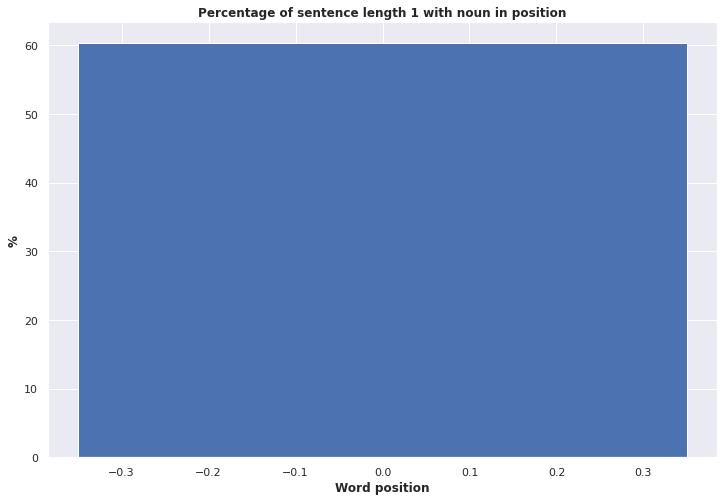

Of the 2224 sentences of length 2, 2043 have a noun.


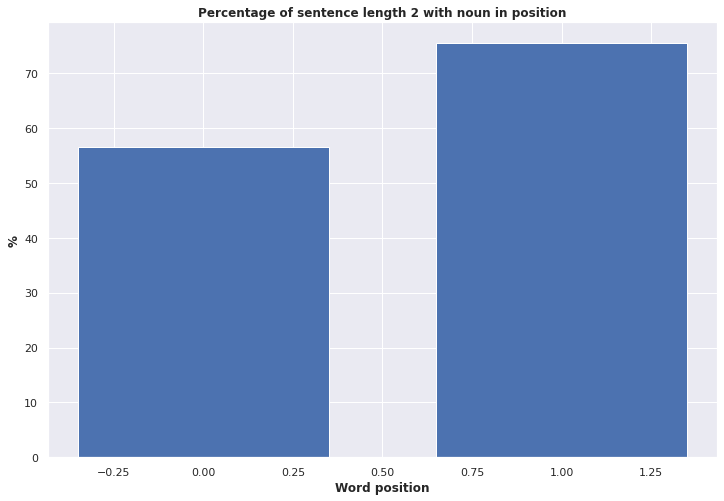

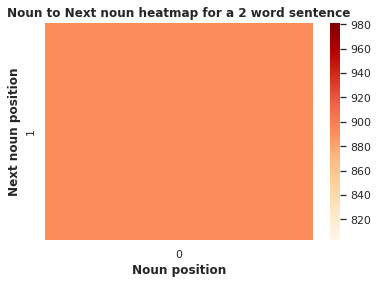

Of the 2568 sentences of length 3, 2521 have a noun.


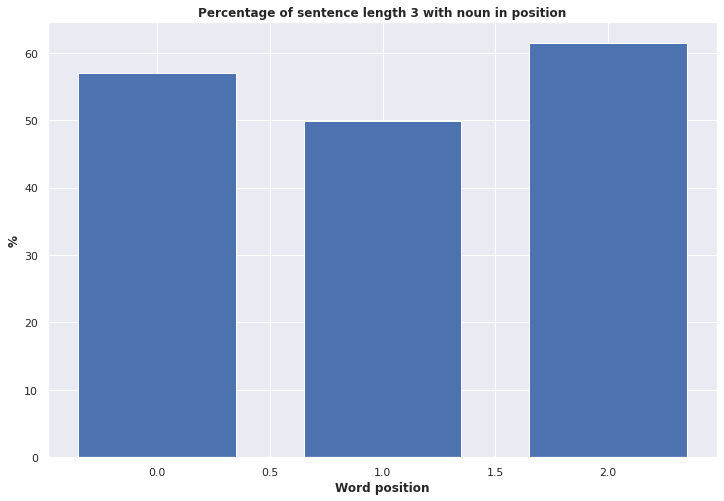

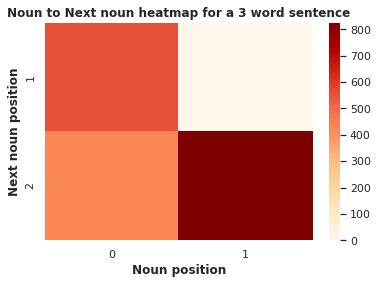

Of the 3000 sentences of length 4, 2971 have a noun.


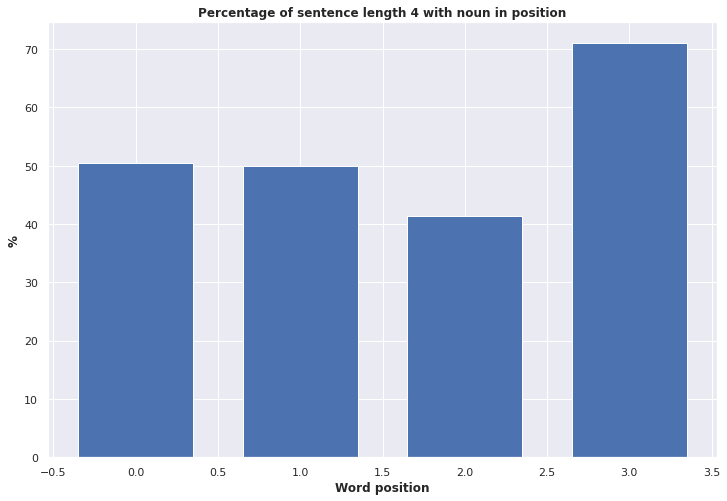

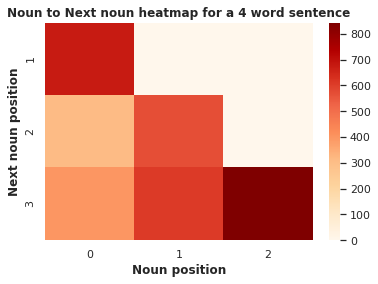

Of the 3897 sentences of length 5, 3892 have a noun.


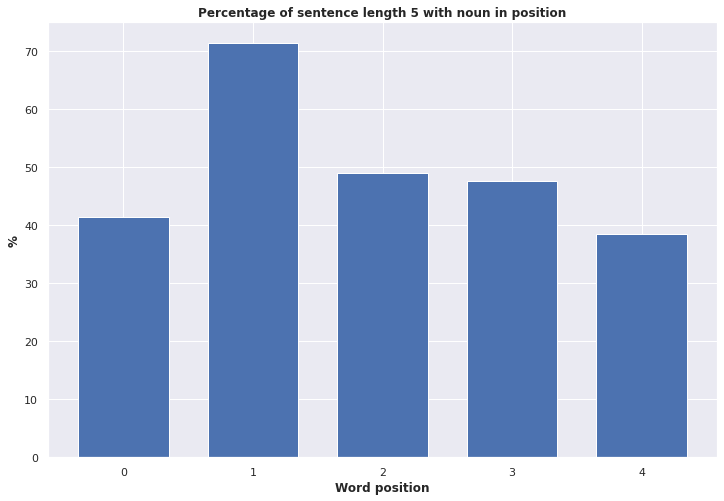

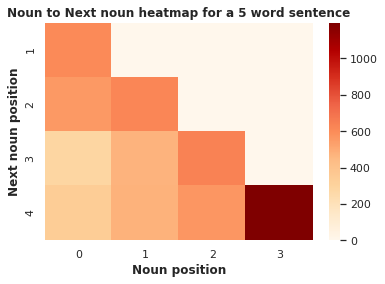

Of the 5210 sentences of length 6, 5184 have a noun.


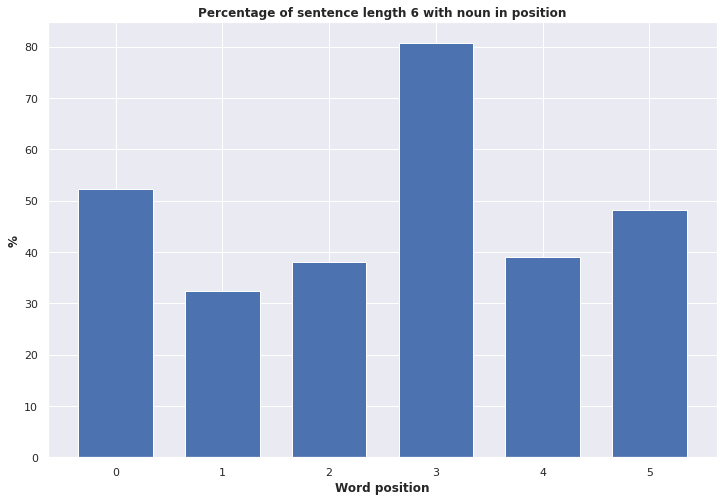

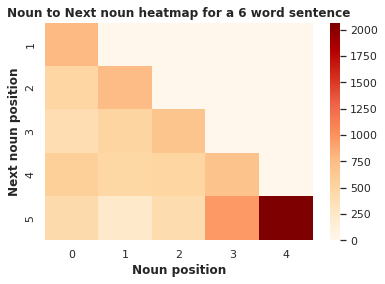

Of the 5715 sentences of length 7, 5678 have a noun.


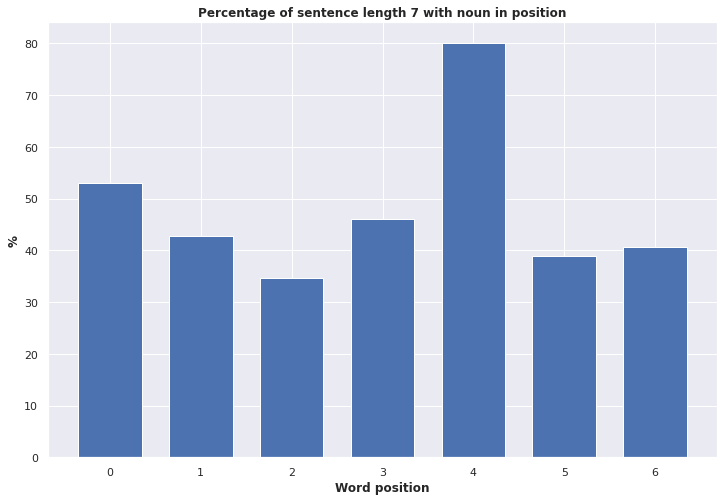

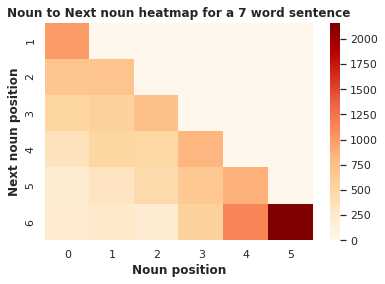

Of the 7159 sentences of length 8, 7156 have a noun.


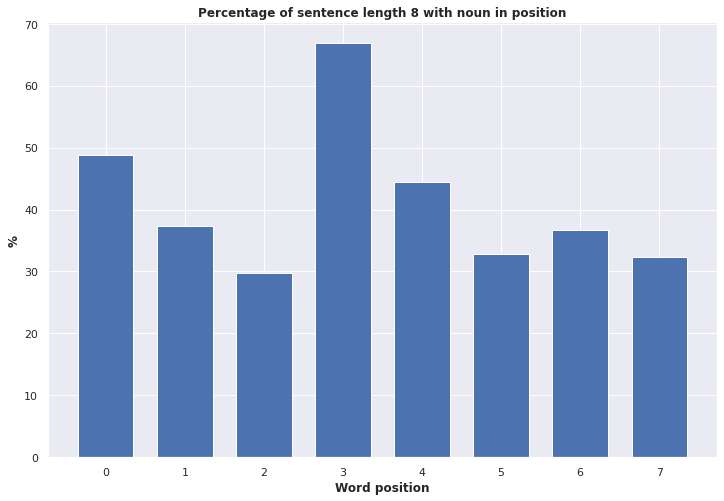

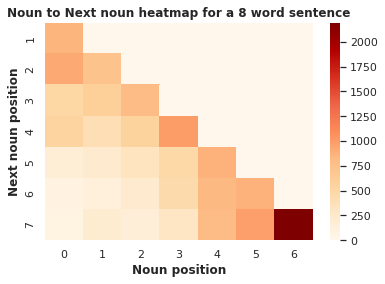

Of the 6512 sentences of length 9, 6509 have a noun.


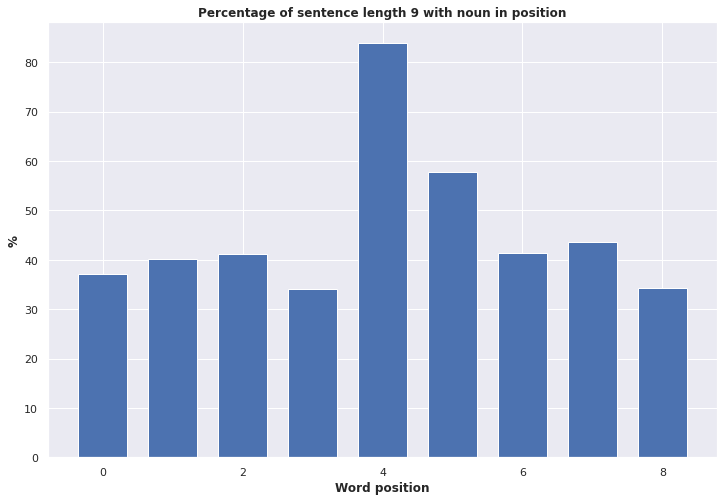

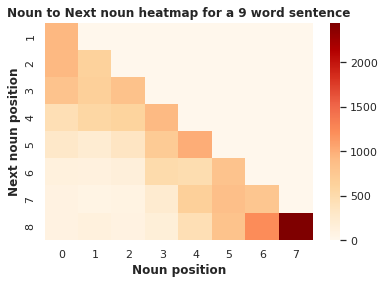

Of the 7397 sentences of length 10, 7397 have a noun.


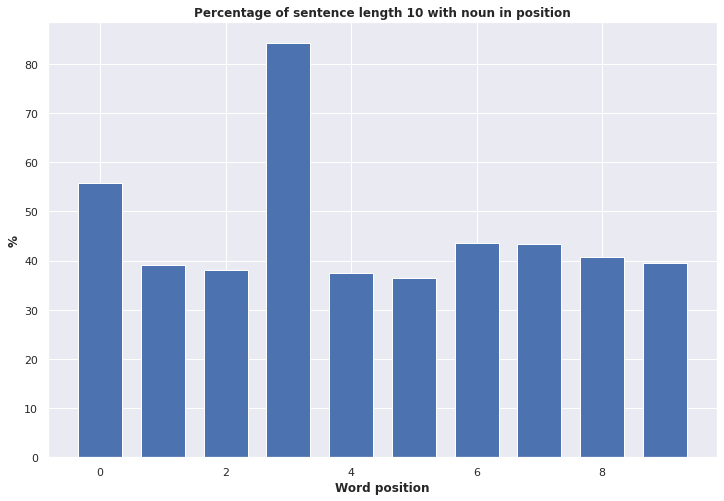

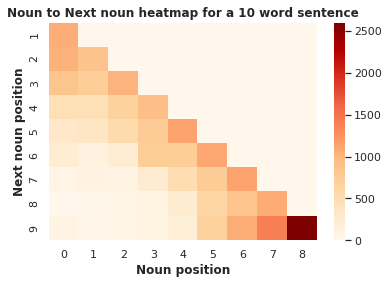

Of the 7726 sentences of length 11, 7726 have a noun.


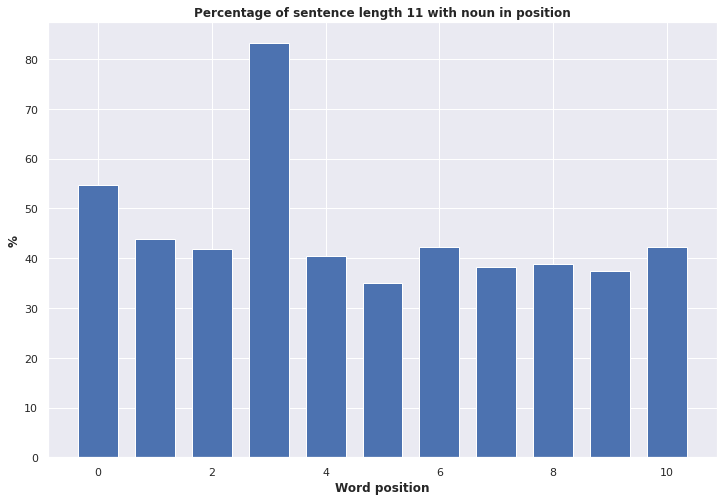

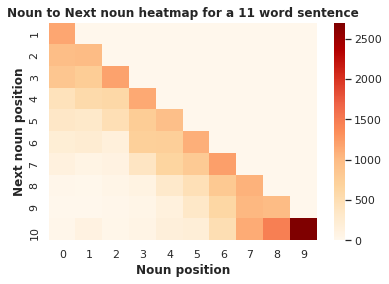

Of the 7997 sentences of length 12, 7993 have a noun.


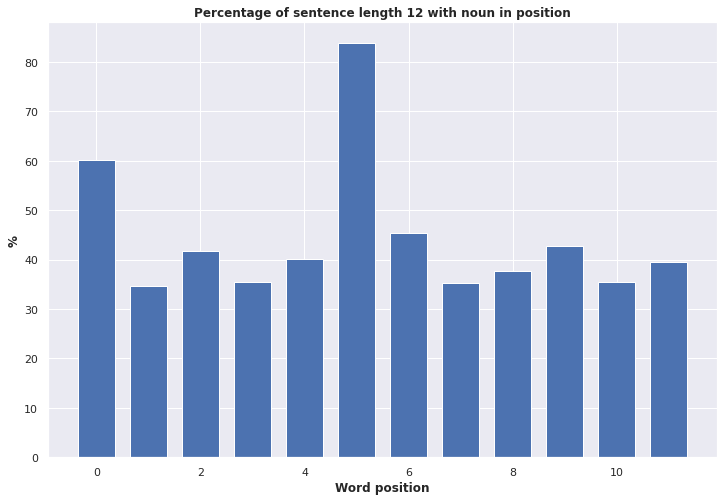

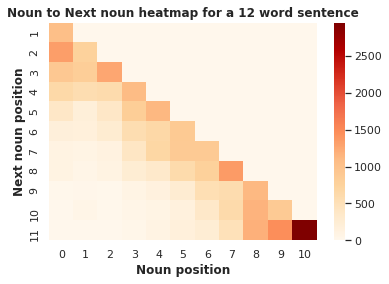

Of the 8123 sentences of length 13, 8123 have a noun.


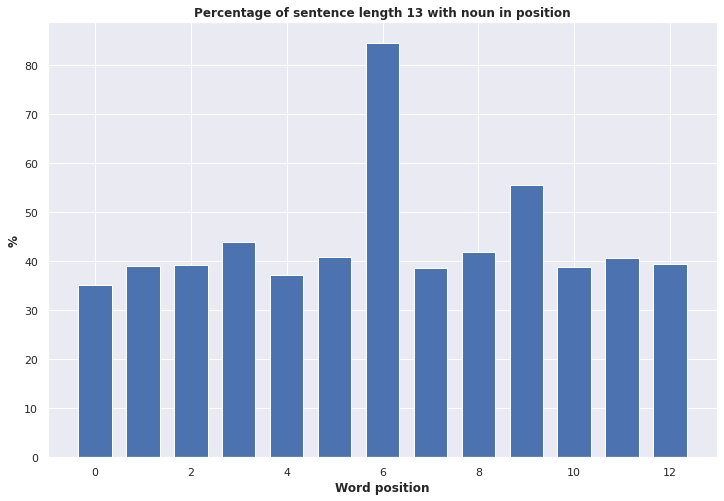

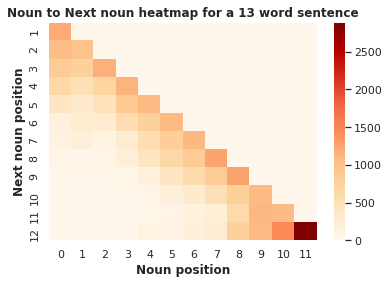

Of the 7715 sentences of length 14, 7715 have a noun.


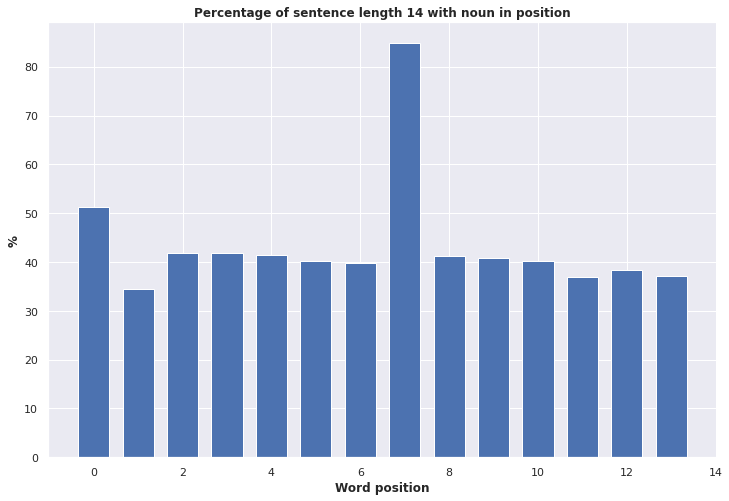

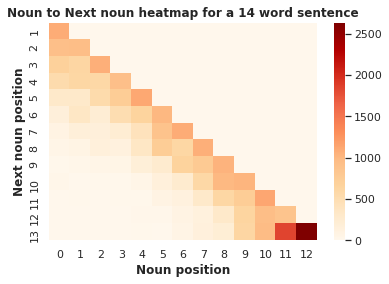

Of the 7676 sentences of length 15, 7676 have a noun.


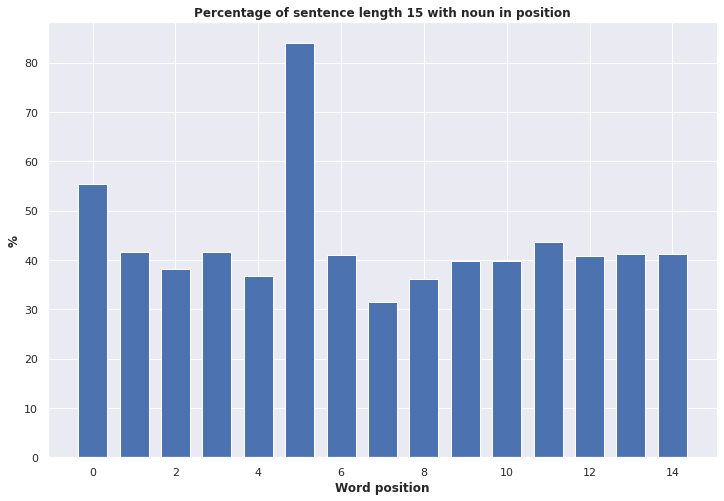

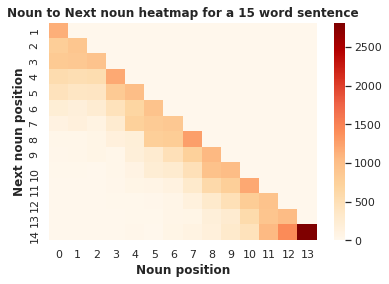

Of the 7546 sentences of length 16, 7546 have a noun.


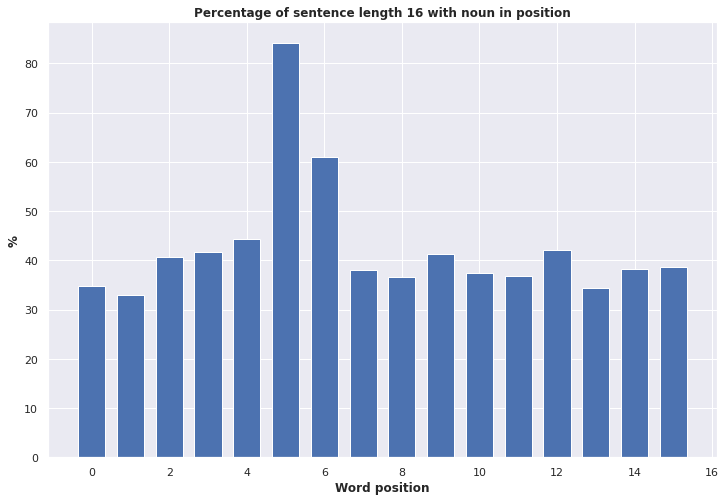

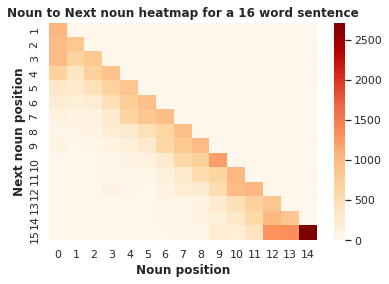

Of the 7154 sentences of length 17, 7154 have a noun.


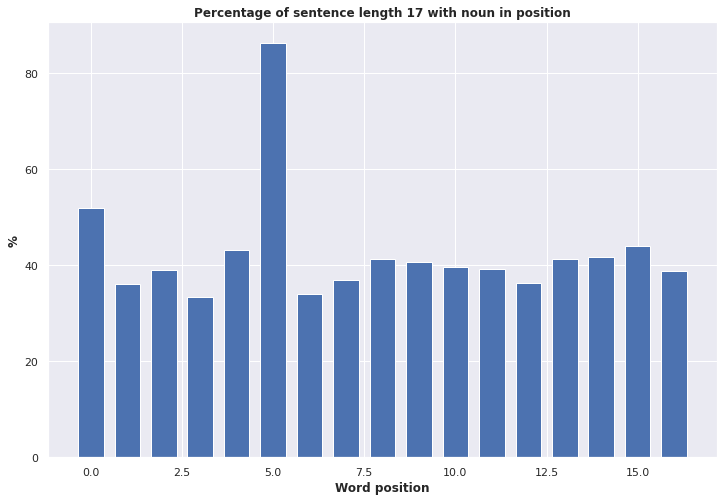

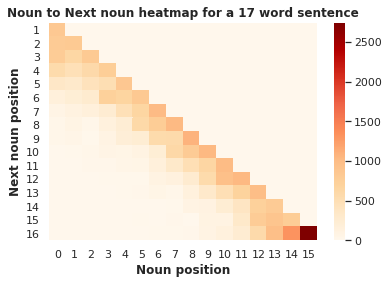

Of the 7291 sentences of length 18, 7291 have a noun.


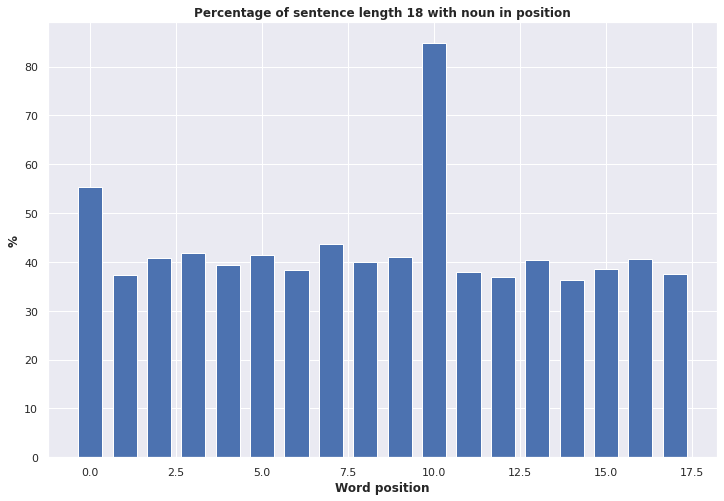

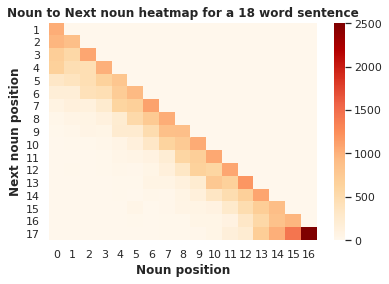

Of the 6566 sentences of length 19, 6566 have a noun.


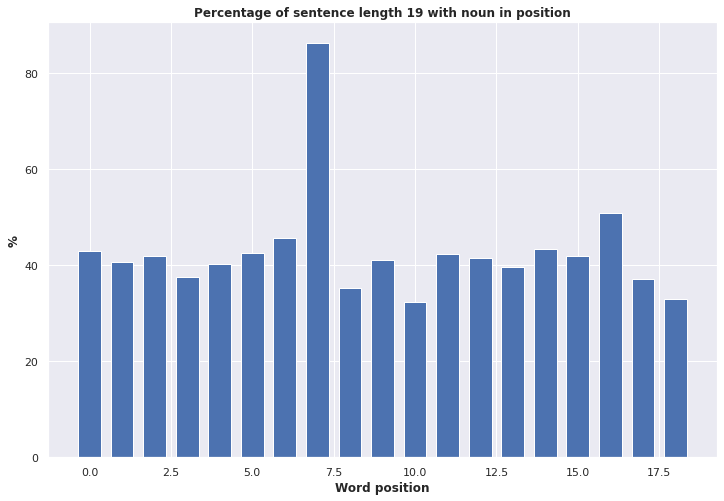

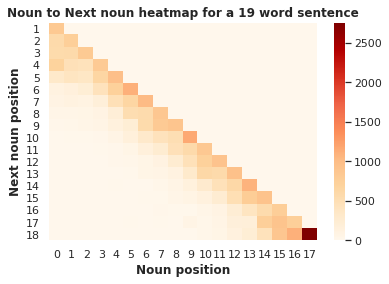

Of the 6598 sentences of length 20, 6598 have a noun.


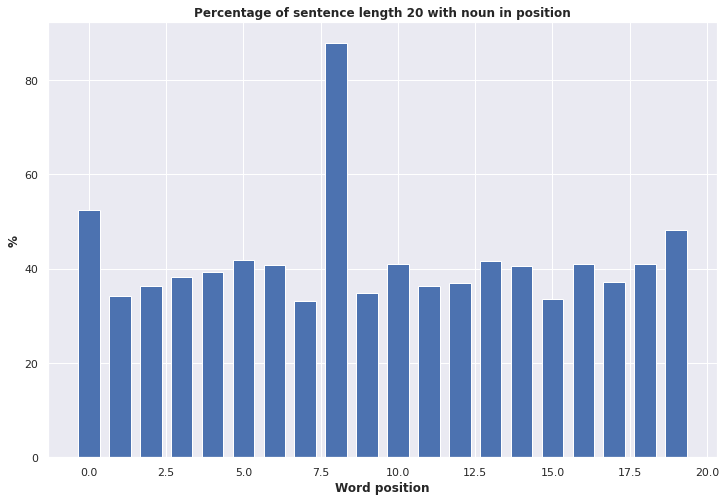

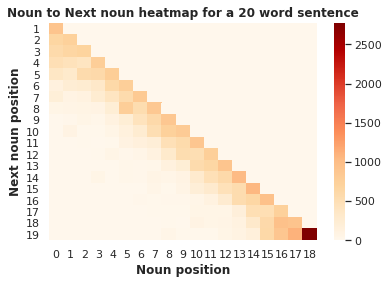

In [31]:

# Your Code below
nltk.download('averaged_perceptron_tagger')                                     #for POS tagging
import seaborn as sns; sns.set()                                                #for later heatmaps

sent_noun_breakdown = []                                                        #create empty list
for record in lower:                                                            #for every record in lower

#remove an array of unwanted elements and split based on sentence ending
    message = re.sub(r'\s|[^A-Za-z0-9/.]+',' ', record.replace('\xa0','').replace('/', ' ').replace('-', ' ')).replace('! ', '. ').replace('? ', '. ').split('. ')
    for sentance in message:                                                    #for each sentence
        token_list = tokenizer.tokenize(sentance)                               #tokenize
        sent_len = len(token_list)                                              #calculate sentence length
        pos_sent = (nltk.tag.pos_tag(token_list))                               #POS tag all words in sentence
        i = 0                                                                   #initialise counter
        noun_pos = []                                                           #create empty list
        for t,p in pos_sent:                                                    #for each word in sentence
            if p.startswith('NN') or p.startswith('PR'):                        #if noun
                noun_pos.append(i)                                              #append word position to list
            i += 1                                                              #increment counter
        sent_noun_breakdown.append([sent_len, noun_pos])                        #append sentence length and list of noun positions to list
sentencenb = pd.DataFrame(sent_noun_breakdown)                                  #convert to dataframe for ease of heatmaping

#noun_count = []
for sent_length in range(1, 21):                                                #visualise all sentences between lengths 1 and 20 
#print summary of sentences with nouns
    print('Of the %d sentences of length %d, %d have a noun.' % (len(sentencenb[(sentencenb[0] == sent_length)]), sent_length, len(sentencenb[(sentencenb[0] == sent_length) & sentencenb[1].astype(bool)])))

#create plot of those sentences with nouns and the percentage of sentences with a noun in each position
    plt.figure(figsize=(12,8))
    plt.title('Percentage of sentence length %d with noun in position' % (sent_length), fontweight = 'bold')
    plt.xlabel('Word position', fontweight = 'bold')
    plt.ylabel('%', fontweight = 'bold')

#create an array of frequencies for all sentences of length sent_length
    FD = np.array(list((FreqDist(list(chain.from_iterable(sentencenb[(sentencenb[0] == sent_length) & sentencenb[1].astype(bool)][1]))).values())))
#convert frequencies to percentages and plot
    plt.bar(range(0,sent_length), FD / len(sentencenb[(sentencenb[0] == sent_length)]) * 100, align='center', alpha=1, width= 0.7)
    plt.show()

    if sent_length > 1:                                                         #for all sentences of length 2-20
        next_noun = np.zeros([sent_length - 1, sent_length - 1])                #create array of zeros
        for l in list(sentencenb[(sentencenb[0] == sent_length)][1]):           #for each list of noun position entries 
            len_l = len(l)                                                      # calculate number of nouns
            if len_l > 1:                                                       # if more than one noun
                for lpos in range(0, len_l):                                    #for each noun position entry
                    if lpos + 1 < len_l:                                        #if not last entry
                        next_noun[l[lpos + 1]-1][l[lpos]] += 1                  #increment count of next noun position

# create heat map of noun position vs next noun position
        ax = plt.axes()
        ax = sns.heatmap(pd.DataFrame(next_noun), yticklabels=list(range(1,sent_length)) , ax = ax, cmap="OrRd")
        ax.set_title('Noun to Next noun heatmap for a %d word sentence' % (sent_length), fontweight = 'bold')
        ax.set_xlabel('Noun position', fontweight = 'bold')
        ax.set_ylabel('Next noun position', fontweight = 'bold')
        plt.show()

